In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df=sns.load_dataset('flights')

In [5]:
def time(year,month):
    return pd.to_datetime(str(year)+'-'+month)

In [6]:
df['date']=df[['year','month']].apply(lambda x:time(x['year'],x['month']),axis=1)

In [7]:
df.drop(columns=['year','month'],inplace=True)

In [8]:
df.set_index('date',inplace=True)

In [9]:
df.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='date'>

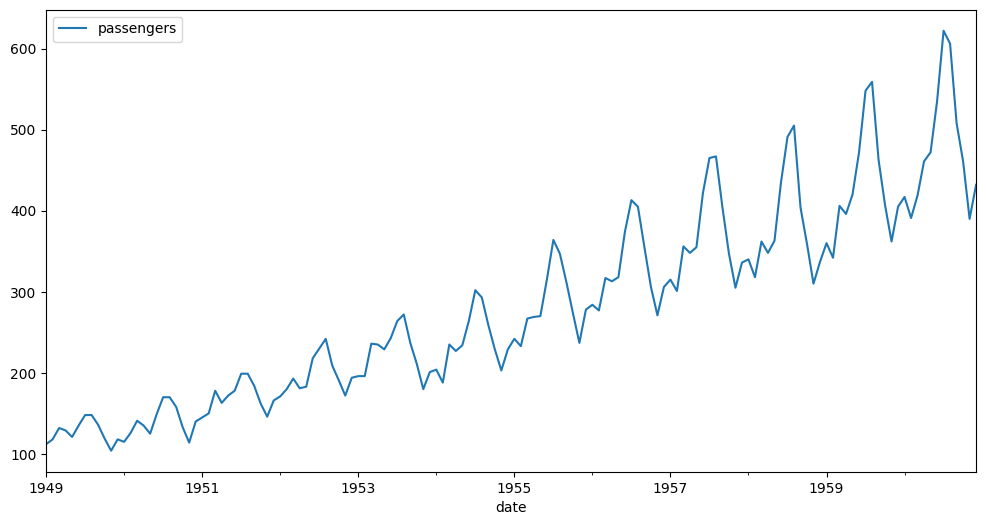

In [10]:
df.plot(figsize=(12,6))

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

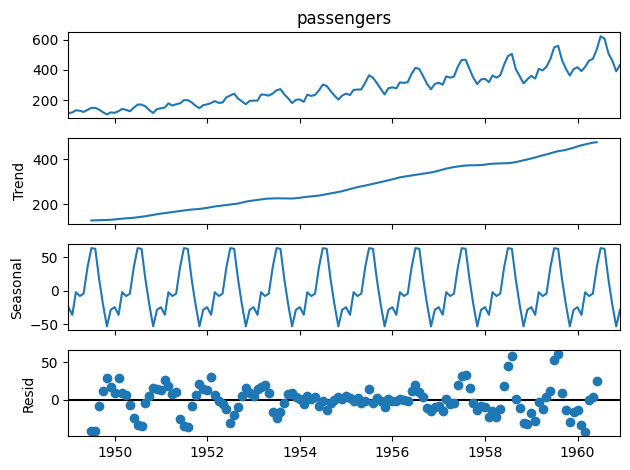

In [12]:
results=seasonal_decompose(df['passengers'])
results.plot();

In [13]:
df.shape

(144, 1)

In [73]:
train=df.iloc[:122]
test=df.iloc[122:]

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [74]:
train=scaler.fit_transform(train)
test=scaler.transform(test)


In [38]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [39]:
n_input=12
n_features=1
generator=TimeseriesGenerator(train,train,length=n_input,batch_size=1)

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LSTM

In [59]:
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [60]:
history=model.fit(generator,epochs=50)

Epoch 1/50
110/110 [==============================] - 4s 24ms/step - loss: 0.0258
Epoch 2/50
110/110 [==============================] - 2s 14ms/step - loss: 0.0146
Epoch 3/50
110/110 [==============================] - 2s 14ms/step - loss: 0.0112
Epoch 4/50
110/110 [==============================] - 1s 14ms/step - loss: 0.0120
Epoch 5/50
110/110 [==============================] - 2s 14ms/step - loss: 0.0096
Epoch 6/50
110/110 [==============================] - 2s 19ms/step - loss: 0.0086
Epoch 7/50
110/110 [==============================] - 2s 15ms/step - loss: 0.0073
Epoch 8/50
110/110 [==============================] - 2s 14ms/step - loss: 0.0045
Epoch 9/50
110/110 [==============================] - 2s 14ms/step - loss: 0.0106
Epoch 10/50
110/110 [==============================] - 2s 14ms/step - loss: 0.0067
Epoch 11/50
110/110 [==============================] - 2s 14ms/step - loss: 0.0042
Epoch 12/50
110/110 [==============================] - 2s 21ms/step - loss: 0.0034
Epoch 13/50
1

<Axes: >

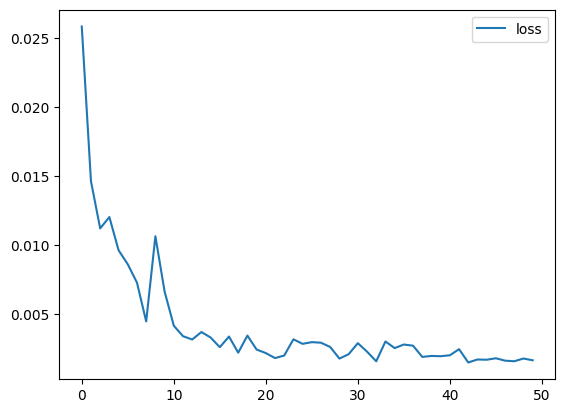

In [61]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot()

In [62]:
last_train_batch=train[-12:]
last_train_batch=last_train_batch.reshape((1,n_input,n_features))
model.predict(last_train_batch)

1/1 [==============================] - 0s 139ms/step


array([[0.67701906]], dtype=float32)

In [63]:
test[0]

array([0.75311721])

In [67]:
test_prediction=[]
first_eval_batch=train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
test_prediction=scaler.inverse_transform(test_prediction)
test_prediction

1/1 [==============================] - 0s 18ms/step


array([[375.48464292],
       [388.43412071],
       [413.30282766],
       [485.1000486 ],
       [544.42847407],
       [550.05000246],
       [469.17880636],
       [398.40222567],
       [357.14380783],
       [364.79143929],
       [378.41340864],
       [378.38752335],
       [397.18267745],
       [417.96021885],
       [455.10600764],
       [527.36015284],
       [585.92428124],
       [591.33820152],
       [523.14713764],
       [440.20363694],
       [393.00384134],
       [389.18199748]])

In [47]:
scaler.inverse_transform([test[1]])

array([[396.]])

In [69]:
test['prediction']=test_prediction

<Axes: xlabel='date'>

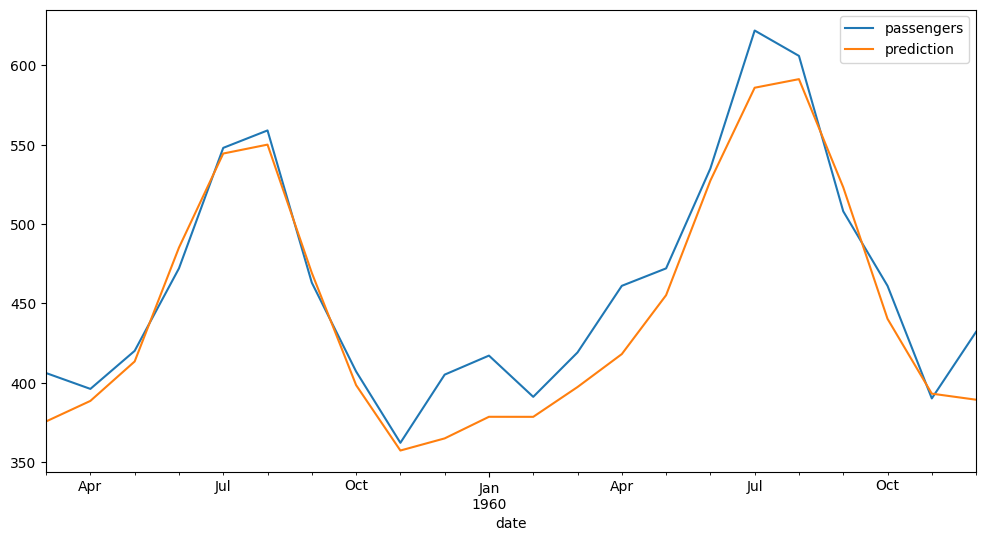

In [70]:
test.plot(figsize=(12,6))

In [71]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['passengers'],test['prediction']))

22.75472818343908

In [79]:
future_date=pd.DataFrame(pd.date_range(start='1961-01-01',end="1963-12-01",freq='MS'),columns=['dates'])
future_date.set_index('dates',inplace=True)

In [82]:
test_prediction=[]
first_eval_batch=test[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))
for i in range(36):
    current_pred=model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
test_prediction=scaler.inverse_transform(test_prediction)
test_prediction

1/1 [==============================] - 0s 19ms/step


array([[437.48403293],
       [418.12862855],
       [437.81327558],
       [473.01905435],
       [507.54206395],
       [567.59128582],
       [637.30917513],
       [634.26532388],
       [558.02553809],
       [482.42667001],
       [429.29558307],
       [437.93586618],
       [445.35588402],
       [436.67506403],
       [450.72814405],
       [485.40620244],
       [532.54017341],
       [593.66682541],
       [646.32184303],
       [653.70658231],
       [597.13827384],
       [512.99451339],
       [455.18923253],
       [447.52044827],
       [449.95681995],
       [447.27880448],
       [460.17868674],
       [495.69523233],
       [550.6063807 ],
       [611.371786  ],
       [654.01180398],
       [665.21680963],
       [627.13365328],
       [545.18452513],
       [477.61124235],
       [456.69813186]])

In [83]:
future_date['prediction']=test_prediction

<Axes: xlabel='date', ylabel='passengers'>

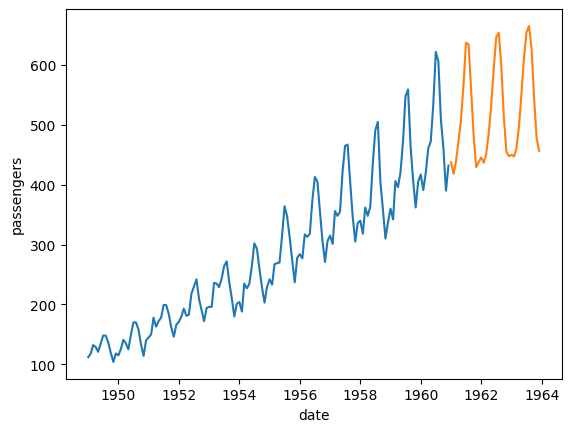

In [84]:
sns.lineplot(data=df,x=df.index,y='passengers')
sns.lineplot(data=future_date,x=future_date.index,y='prediction')